# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values  #taking 1:2 instead of 1 only creates a numpy vector which is necessary for keras input

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [50]:
X_train = []
y_train = []
for i in range(60, 1258):  #done for all batches of 60 at strides of 1
    X_train.append(training_set_scaled[i-60:i, 0])      #data of last 60 time units
    y_train.append(training_set_scaled[i, 0])           #data of current unit (assuming that a trend in which previous bunch of units affect next unit)
X_train, y_train = np.array(X_train), np.array(y_train)

#1st to 60th becomes x then 61st becomes y
#2nd to 61st becomes x then 62nd becomes y and continues(dont overthink it)

### Reshaping

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  #format for LSTMs (no of timestep groups, no of timesteps per group(60), fts per timestep)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [9]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [14]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 54ms/step - loss: 0.0432
Epoch 2/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 1s 31ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 1s 30ms/step - loss: 0.0042
Epoch 13/100
38/38 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values   
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#inputs are only 60 units before test.
#use those 60 to predict 61st
#IMPORTANT - after 61st day predicted, wait till actual stock obtained, use that and not predicted stock

1/1 [==============================] - 2s 2s/step


### Visualising the results

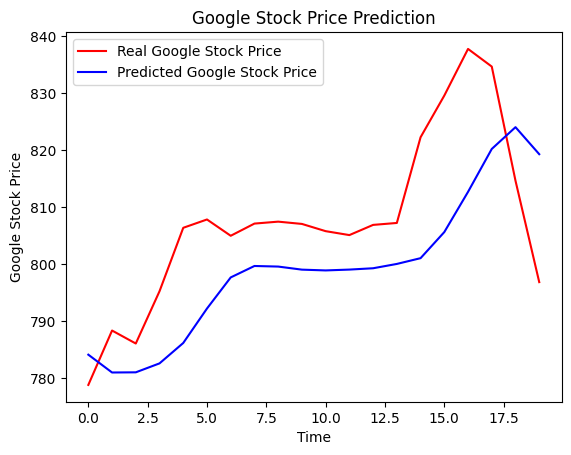

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()